In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-dataset/Health_insurance.csv


# Importing All Necessary Libraries

In [116]:
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv(r"/kaggle/input/health-insurance-dataset/Health_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [16]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


# Univariate Analysis

<Axes: ylabel='Frequency'>

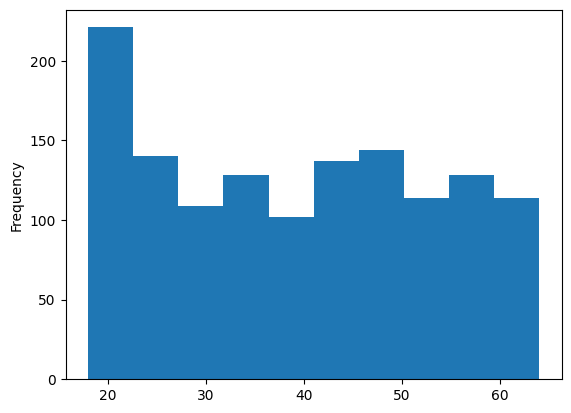

In [17]:
## Age is somewhat right skewed
df['age'].plot(kind='hist')

<Axes: ylabel='count'>

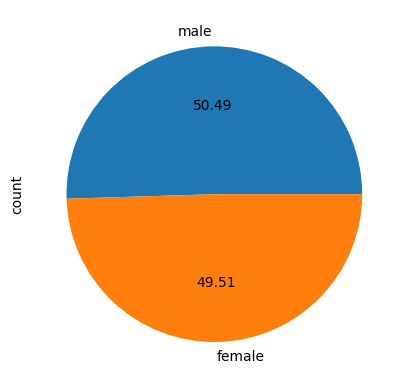

In [23]:
df['sex'].value_counts().plot(kind='pie',autopct='%0.2f')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


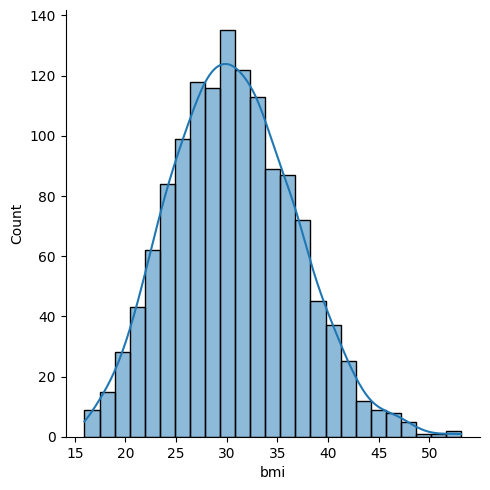

In [37]:
## BMI is normally distributed and average is around 25-35
sns.displot(x=df['bmi'],kde=True)

<Axes: ylabel='count'>

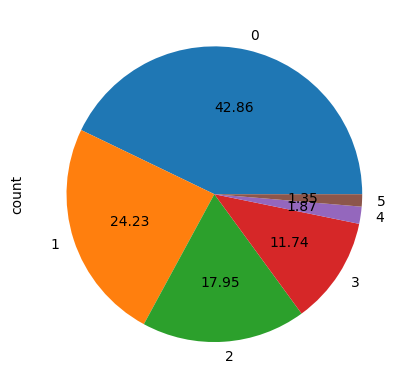

In [45]:
df['children'].value_counts().plot(kind='pie',autopct='%0.2f')

<Axes: xlabel='charges', ylabel='sex'>

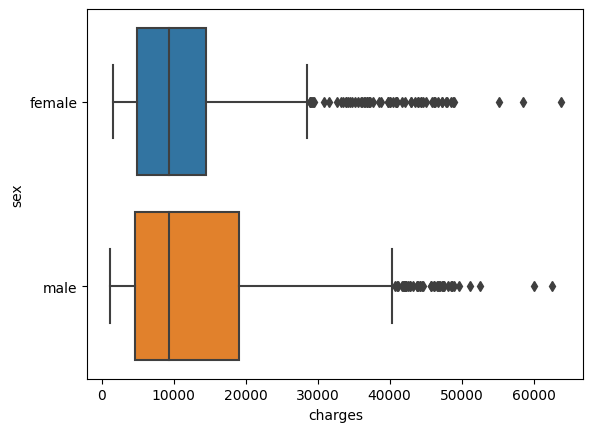

In [69]:
sns.boxplot(x='charges',data=df,y='sex')

In [48]:
df['charges'].nunique()

1337

In [51]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Bivariate Analysis

In [53]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


<Axes: xlabel='age', ylabel='charges'>

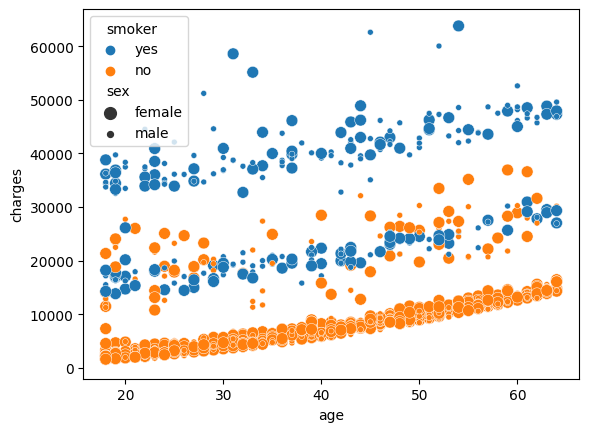

In [62]:
## People who smoke are charged less compared to non-smoker
sns.scatterplot(data=df,x='age',y='charges',hue='smoker',size='sex')

<Axes: xlabel='age', ylabel='bmi'>

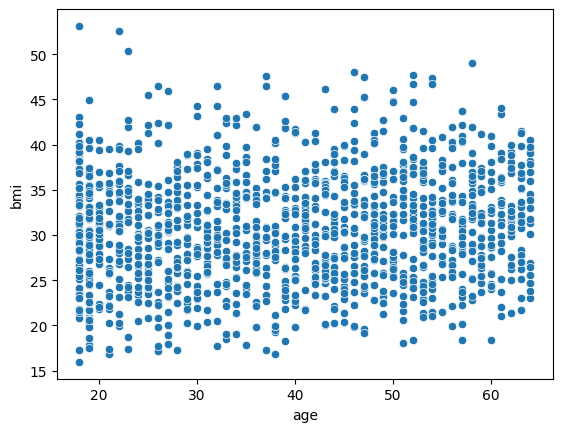

In [61]:
sns.scatterplot(data=df,x='age',y='bmi')

<Axes: xlabel='sex', ylabel='count'>

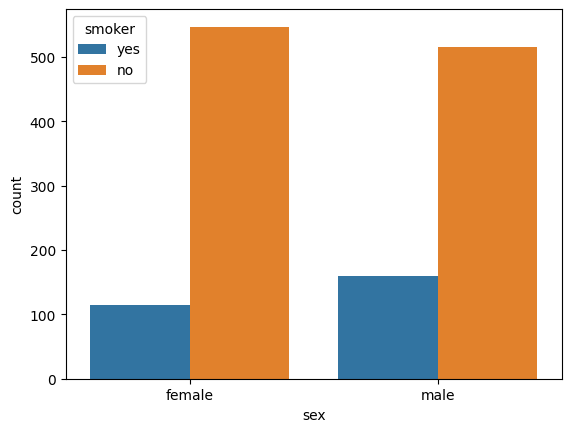

In [63]:
sns.countplot(data=df,x='sex',hue='smoker')

<Axes: xlabel='sex', ylabel='age'>

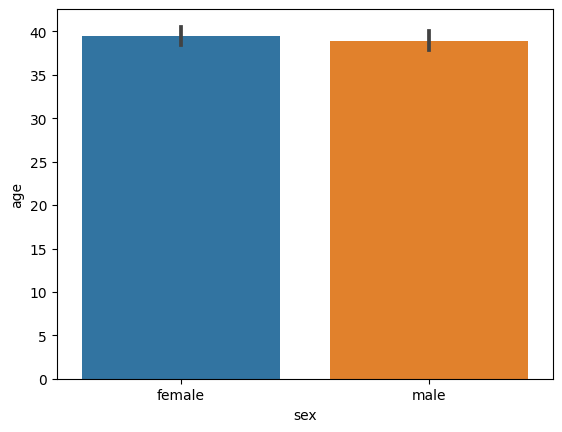

In [74]:
sns.barplot(x='sex',y='age',data=df)

In [75]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


<Axes: >

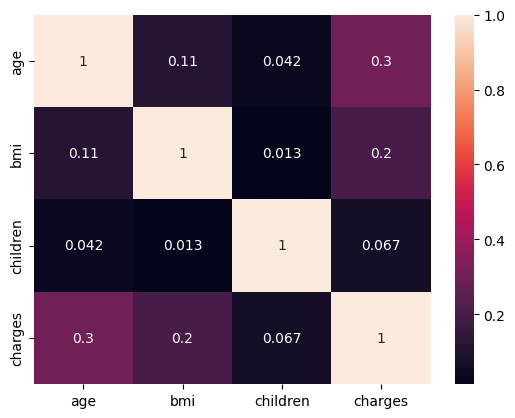

In [77]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

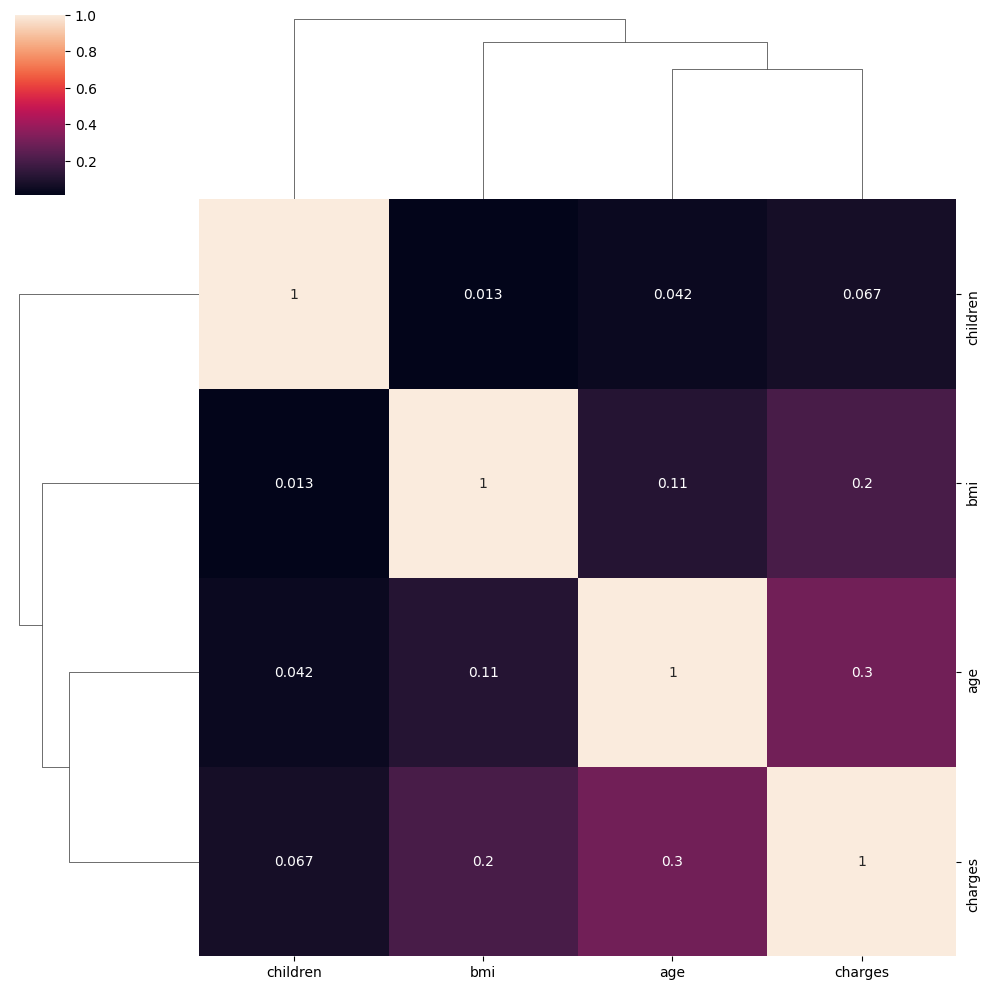

In [84]:
sns.clustermap(df.corr(numeric_only=True),annot=True,)

## Train Test Split

In [86]:
X = df.drop('charges',axis=1)
y= df['charges']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=128)

In [88]:
X_train.shape,X_test.shape

((935, 6), (402, 6))

In [89]:
X_train

,age,sex,bmi,children,smoker,region
628,58,male,38.000,0,no,southwest
631,24,male,29.300,0,no,southwest
1233,58,male,23.300,0,no,southwest
509,57,female,28.700,0,no,southwest
572,30,female,43.120,2,no,southeast
...,...,...,...,...,...,...
10,25,male,26.220,0,no,northeast
1144,50,male,32.300,2,no,southwest
338,50,male,32.300,1,yes,northeast
1108,26,male,30.000,1,no,southwest


In [90]:
X_test

,age,sex,bmi,children,smoker,region
283,55,female,32.395,1,no,northeast
17,23,male,23.845,0,no,northeast
897,19,male,25.555,1,no,northwest
184,44,male,30.690,2,no,southeast
838,35,female,23.465,2,no,northeast
...,...,...,...,...,...,...
1080,18,male,21.780,2,no,southeast
55,58,male,36.955,2,yes,northwest
898,18,female,40.260,0,no,southeast
282,30,male,27.645,1,no,northeast


### Preprocessing: 
#### age - Right skewed --- function transformation
#### sex - One Hot encode
#### bmi - nothing
#### children - nothing
#### smoker - OneHot encode
#### region - oneHot encode

In [92]:
trf = ColumnTransformer(transformers=[
    ('trf1',FunctionTransformer(np.log1p),['age'])
],remainder='passthrough')


In [94]:
trf2 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

In [97]:
trf3 = ColumnTransformer(transformers=[
    ('scaled',StandardScaler(),slice(0,8))
])

In [99]:
trf4 = LinearRegression()

In [104]:
pipe = Pipeline([
    ('trf1',trf),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [105]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['age'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 4, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('trf4', LinearRegression())])

In [107]:
y_pred = pipe.predict(X_test)

In [109]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

In [110]:
print("Mean Absolute Error is: ",mae)
print("Mean Squared Error is: ",mse)
print("Root Mean Squared Error is: ",rmse)
print("R2 score is : ",r2)

Mean Absolute Error is:  4284.934699579764
Mean Squared Error is:  35715399.608863935
Root Mean Squared Error is:  5976.23624105205
R2 score is :  0.7626159780124906


In [114]:
print(cross_val_score(pipe, X, y, cv=5, scoring='r2').mean())

0.7401507344795387
